In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv(r'C:\Users\NANDU\Downloads\creditcard\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
fraud_count = df["Class"].value_counts()
fraud_rate = 100*fraud_count/df.shape[0]
fraud_data = pd.concat([fraud_count, fraud_rate], axis=1).reset_index()
fraud_data.columns = ["Class", "Count", 'Percentage']

fraud_data

,Class,Count,Percentage
0,0,284315,99.827251
1,1,492,0.172749


In [9]:
df_fraud = df[df['Class']==1]
df_not_fraud = df[df['Class']==0]
df_not_fraud_sampled = df_not_fraud.sample(df_fraud.shape[0], replace=False, random_state=101)

df_balanced = pd.concat([df_not_fraud_sampled, df_fraud], axis=0).sample(frac=1, replace=False, random_state=101).reset_index().drop('index', axis=1)
df_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,57027.0,-2.335655,2.225380,-3.379450,2.178538,-3.568264,0.316814,-1.734948,1.449139,-1.980033,-5.711505,1.837215,-4.540342,0.747846,-6.284314,-0.128887,-3.563239,-7.368321,-2.692953,-0.450550,0.274027,0.785540,0.297412,0.308536,-0.598416,-0.121850,-0.491018,0.701606,0.206966,444.17,1
1,125200.0,-0.769172,1.342212,-2.171454,-0.151513,-0.648374,-0.973504,-1.706658,0.313745,-1.982302,-3.158127,1.341572,-3.299472,1.247647,-6.393373,-0.053205,-3.258046,-3.348896,0.217331,-0.917408,-0.102294,-0.036122,-0.753591,-0.047113,0.358493,-0.287407,0.476506,0.250531,0.250987,40.00,1
2,61571.0,1.290858,-0.410013,0.867951,-0.243360,-1.082847,-0.347126,-0.787556,0.081012,1.174355,-0.332715,-1.106743,-0.261615,-0.572483,-0.238087,0.883786,0.523176,-0.334745,0.075584,0.292398,-0.093468,0.013324,0.179744,-0.061696,-0.025827,0.192442,1.446274,-0.062826,0.002057,0.01,0
3,124970.0,1.718628,-0.538832,-0.681069,1.112363,-0.092306,0.530907,-0.385694,0.219596,0.660788,0.276000,0.358876,0.724127,-0.307765,0.292862,-0.103171,0.670515,-1.003935,0.444757,-0.052559,0.002711,-0.128360,-0.601394,0.264292,0.133853,-0.406739,-1.012127,0.022561,-0.013865,123.00,0
4,47125.0,-2.206667,2.001343,0.001870,-0.252962,-0.783760,0.092856,-0.708638,1.068313,-0.039719,0.530358,0.965843,1.404936,0.955206,0.431473,0.367836,0.476718,-0.293056,0.104803,-0.231193,-0.188157,0.276661,0.515704,0.180610,-0.281968,-0.400024,0.183253,-1.074357,-0.271897,5.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,29753.0,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,-4.592390,5.479392,-5.657858,-2.648076,-10.384890,-0.225946,-0.701883,0.409736,0.939604,-1.954300,0.310525,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,0.68,1
980,102669.0,-5.603690,5.222193,-7.516830,8.117724,-2.756858,-1.574565,-6.330343,2.998419,-4.508167,-7.334377,7.188724,-10.655181,2.594680,-10.242859,-0.191158,-5.504334,-8.697777,-1.934225,1.958750,0.227526,1.242896,0.428408,-0.101184,-0.520199,-0.176938,0.461450,-0.106625,-0.479662,0.00,1
981,82124.0,1.199349,0.060077,0.596956,1.616322,-0.132110,0.582179,-0.427010,0.220856,0.033758,0.429056,-1.374210,-0.556287,-0.592753,-0.035459,0.390634,0.595673,-0.321653,-0.556582,-0.630337,-0.151199,-0.106443,-0.238434,-0.043868,-0.740795,0.253933,1.027492,-0.045804,0.000884,10.06,0
982,12095.0,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,-4.138891,5.149409,-11.124019,0.543068,-7.840942,0.743634,-6.777069,-9.931765,-4.093021,1.504925,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,30.39,1


In [11]:
# Checking the balance of the dataset
fraud_count = df_balanced["Class"].value_counts()
fraud_rate = 100 * fraud_count / df_balanced.shape[0]
fraud_data = pd.concat([fraud_count, fraud_rate], axis=1).reset_index()
fraud_data.columns = ['Class', 'Count', 'Percentage']
fraud_data


,Class,Count,Percentage
0,1,492,50.0
1,0,492,50.0


In [12]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop('Class', axis=1), df_balanced['Class'], test_size=0.2, random_state=101)

print(f'''X_train: {X_train.shape}
X_test: {X_test.shape}
y_train: {y_train.shape}
y_test: {y_test.shape}''')

X_train: (787, 30)
X_test: (197, 30)
y_train: (787,)
y_test: (197,)


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define and train the model
randomforestModel = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

randomforestModel.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [16]:
y_pred_logis = randomforestModel.predict(X_test)
y_pred_logis


array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [17]:
# classification report
cr = classification_report(y_test, y_pred_logis)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       101
           1       0.95      0.92      0.93        96

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [19]:
import pickle

# Saving model
with open('./model.pkl', 'wb') as fp:
    pickle.dump(randomforestModel, fp)


First 20 Predictions (0 = Normal, 1 = Fraud): [0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
First 20 Fraud Probabilities: [0.2  0.58 1.   1.   1.   0.   0.01 0.29 1.   0.03 0.05 0.22 0.2  0.93
 0.   0.31 0.06 0.03 0.04 0.27]

Model Accuracy: 0.934010152284264

Confusion Matrix:
 [[96  5]
 [ 8 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       101
           1       0.95      0.92      0.93        96

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



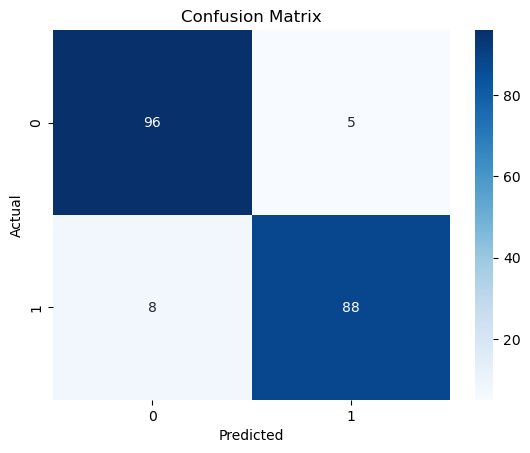

In [21]:
# --- Make Predictions ---
# --- Make Predictions ---
y_pred = randomforestModel.predict(X_test)
y_pred_prob = randomforestModel.predict_proba(X_test)[:, 1]  # Probability of fraud (class 1)

# --- Show first 20 predictions and probabilities ---
print("First 20 Predictions (0 = Normal, 1 = Fraud):", y_pred[:20])
print("First 20 Fraud Probabilities:", y_pred_prob[:20])

# --- Evaluate the Model ---
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# --- Optional: Visualize Confusion Matrix ---
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

